## Financial Market Analytics using Machine Learning and Natural Language processing

## Workflow

We would use supervised classification algorithms like Naive Bayes, Random Forest, Logistic Regression, and Support Vector Machines to anticipate the stock price movement and compare the accuracy of different models. In addition, we will perform regression analysis utilizing the Linear Regression technique and the LSTM model (Deep Learning) to forecast stock prices.
Further we will also develop data visualizations with wordcloud and matplotlib to offer a clear understanding of what the data means by putting it in context with graphs.

We would like to use different NLP methods. 
-> Bag of words - to extract features from news headlines for modeling, 
-> CountVectorizer - to convert a given headline into a vector based on frequency, 
-> The n-gram model - to determine if the model's prediction accuracy improves or not,
-> Latent Dirichlet allocation topic modeling - to categorize news texts in certain topics to a document. 



## Import Libraries

In [210]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn. preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model    
from matplotlib import rcParams
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

## Read Excel Data

In [115]:
df1= pd.read_excel("stock_value.xlsx")

## Data Cleaning and Pre-processing

In [116]:
df1.rename(columns={'Close*': 'Close',
                   'Adj Close**': 'Adj Close'},
          inplace=True, errors='raise')

In [117]:
df1.Date = pd.to_datetime(df1.Date, format='%b %d, %Y')

In [118]:
df1 = df1.sort_values(by='Date',ascending=True)
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2223,2008-01-25,12391.70,12486.89,12183.68,12207.17,12207.17,393660000
2222,2008-01-28,12205.71,12386.01,12112.14,12383.89,12383.89,278990000
2221,2008-01-29,12385.19,12503.15,12346.99,12480.30,12480.30,285090000
2220,2008-01-30,12480.14,12681.41,12406.17,12442.83,12442.83,334680000
2219,2008-01-31,12438.28,12702.38,12249.93,12650.36,12650.36,394330000


In [90]:
df1.reset_index(inplace=True)

In [91]:
df1['Date'] = df1['Date'].dt.strftime('%d-%m-%Y')

In [92]:
df1.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,2223,25-01-2008,12391.70,12486.89,12183.68,12207.17,12207.17,393660000
1,2222,28-01-2008,12205.71,12386.01,12112.14,12383.89,12383.89,278990000
2,2221,29-01-2008,12385.19,12503.15,12346.99,12480.30,12480.30,285090000
3,2220,30-01-2008,12480.14,12681.41,12406.17,12442.83,12442.83,334680000
4,2219,31-01-2008,12438.28,12702.38,12249.93,12650.36,12650.36,394330000


In [93]:
df1['Stock Label'] = [1 if df1['Close'][i] > df1['Open'][i] else 0 for i in range(len(df1))]

In [94]:
df1['Year'] = pd.DatetimeIndex(df1['Date']).year

In [95]:
df1.isnull().sum()

index          0
Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
Stock Label    0
Year           0
dtype: int64

## We'll utilize Pandas' describe() method to gain a high-level picture of how the stock has done over the last few months.

In [12]:
df1.iloc[-90:].describe().astype(int)

,index,Open,High,Low,Close,Adj Close,Volume,Stock Label,Year
count,90,90,90,90,90,90,90,90,90
mean,44,18375,18439,18307,18378,18378,89496444,0,2016
std,26,228,219,240,240,240,27901708,0,0
min,0,17928,17986,17883,17888,17888,60090000,0,2016
25%,22,18184,18258,18117,18168,18168,74412500,0,2016
50%,44,18386,18417,18289,18373,18373,84750000,0,2016
75%,66,18533,18570,18469,18533,18533,95787500,1,2016
max,89,18909,18960,18883,18956,18956,278510000,1,2016


## In last 90 days, the average closing price for stock was about 18378.
## For about 75% of time the stock was trading below 18533 and it clocked maximum of 18956. The maximum volume of shares traded on a single day was 278510000 with median quantity being 84750000.

In [13]:
df1.index = df1["Date"]

## Plotting the closing price (adjusted) of the stock over the period to get a general idea of how the stock performed in the given period.

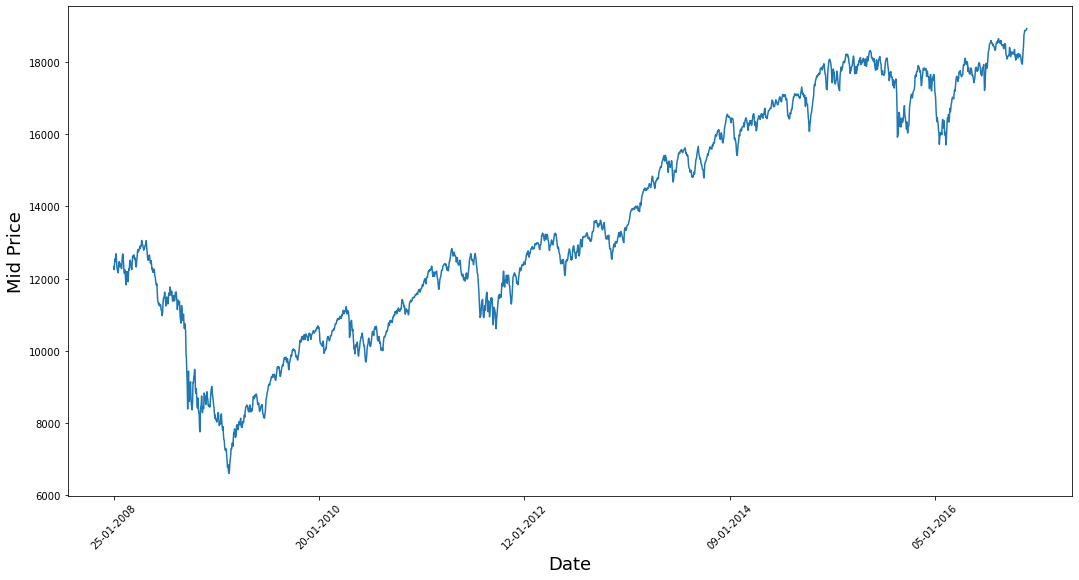

In [14]:
plt.figure(figsize = (18,9))
plt.plot(range(df1.shape[0]),(df1['Low']+df1['High'])/2.0)
plt.xticks(range(0,df1.shape[0],500),df1['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

### Daily percentage change in the price of the stock is calculated on the basis of percentage change between 2 consecutive days’ closing prices. Let’s say if the closing price of the stock yesterday was 500 and today the stock closed as 550. So, the percentage change is 10%. i.e. ((550–500) / 500)*100.

In [15]:
df1["Daily % Change"] = df1["Adj Close"].pct_change()*100
df1.dropna(axis = 0, inplace = True)
df1.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Stock Label,Year,Daily % Change
Date,,,,,,,,,,,
28-01-2008,2222,28-01-2008,12205.71,12386.01,12112.14,12383.89,12383.89,278990000,1,2008,1.447674
29-01-2008,2221,29-01-2008,12385.19,12503.15,12346.99,12480.30,12480.30,285090000,1,2008,0.778511
30-01-2008,2220,30-01-2008,12480.14,12681.41,12406.17,12442.83,12442.83,334680000,0,2008,-0.300233
31-01-2008,2219,31-01-2008,12438.28,12702.38,12249.93,12650.36,12650.36,394330000,1,2008,1.667868
01-02-2008,2218,01-02-2008,12638.17,12767.74,12602.32,12743.19,12743.19,379580000,1,2008,0.733813


<AxesSubplot:xlabel='Date'>

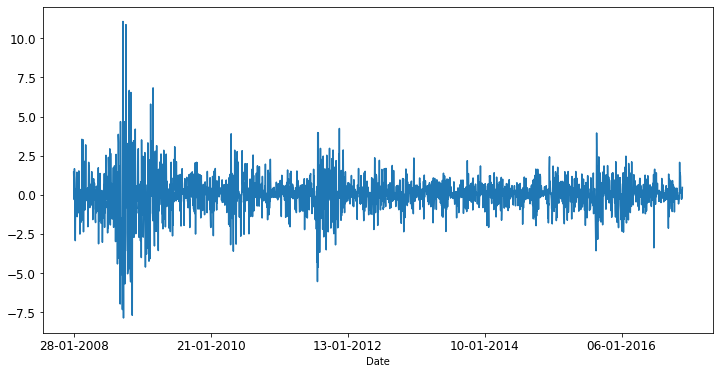

In [16]:
df1['Daily % Change'].plot(figsize = (12, 6), fontsize = 12)

### It can be observed that for most of the days, the returns are between -2% to 2% with few spikes in between crossing 5% mark on both the sides.

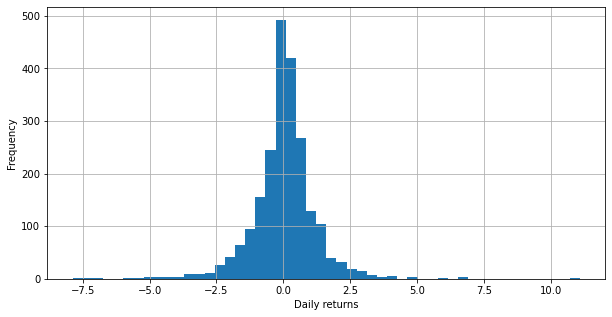

count    2223.000000
mean        0.027530
std         1.243963
min        -7.873277
25%        -0.447137
50%         0.049197
75%         0.560034
max        11.080333
Name: Daily % Change, dtype: float64

In [17]:
df1['Daily % Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
#satistics
df1['Daily % Change'].describe()

### The daily returns histogram is centered on the origin. The average daily return has been about 0.027, and the daily return has been less than 1% for the bulk of the days, indicating that the stock has been less volatile over that time. During this time, the largest positive percent change was 11 percent, while the largest negative percent change was 7.87 percent. 

### Analyzing the Trend


In [18]:
def daily_percent_trend(x):
    
    if x > -0.5 and x <= 0.5:
        return 'Slight or No change'
    elif x > 0.5 and x <= 1:
        return 'Slight Positive'
    elif x > -1 and x <= -0.5:
        return 'Slight Negative'
    elif x > 1 and x <= 3:
        return 'Positive'
    elif x > -3 and x <= -1:
        return 'Negative'
    elif x > 3 and x <= 7:
        return 'Among top gainers'
    elif x > -7 and x <= -3:
        return 'Among top losers'
    elif x > 7:
        return 'Bull run'
    elif x <= -7:
        return 'Bear drop'

      
df1['Trend_category']= np.zeros(df1['Daily % Change'].count())
df1['Trend_category']= df1['Daily % Change'].apply(lambda x:daily_percent_trend(x))
df1.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Stock Label,Year,Daily % Change,Trend_category
Date,,,,,,,,,,,,
28-01-2008,2222,28-01-2008,12205.71,12386.01,12112.14,12383.89,12383.89,278990000,1,2008,1.447674,Positive
29-01-2008,2221,29-01-2008,12385.19,12503.15,12346.99,12480.30,12480.30,285090000,1,2008,0.778511,Slight Positive
30-01-2008,2220,30-01-2008,12480.14,12681.41,12406.17,12442.83,12442.83,334680000,0,2008,-0.300233,Slight or No change
31-01-2008,2219,31-01-2008,12438.28,12702.38,12249.93,12650.36,12650.36,394330000,1,2008,1.667868,Positive
01-02-2008,2218,01-02-2008,12638.17,12767.74,12602.32,12743.19,12743.19,379580000,1,2008,0.733813,Slight Positive


### We're curious about the stock's performance over time. This can be shown as a pie chart, with each sector representing the percentage of days on which each pattern occurred. We'll construct a pie chart for the 'Trend' column to see the relative frequency of each trend type. We'll use the groupby() method with the trend column to aggregate all days with the same trend into a single group before creating the pie chart.

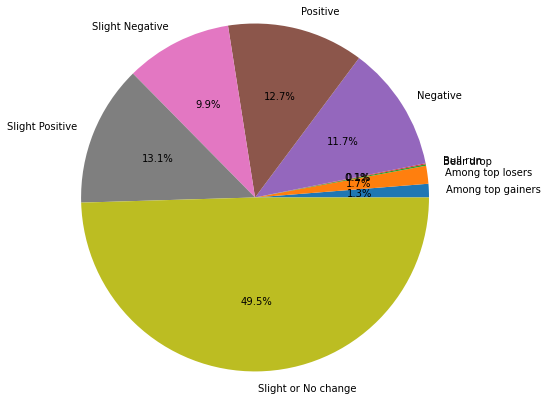

In [20]:
df1_pie_plot_data = df1.groupby('Trend_category')
pie_label = sorted([i for i in df1.loc[:, 'Trend_category'].unique()])
plt.pie(df1_pie_plot_data['Trend_category'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)

plt.show()

In [22]:
# Machine Learning - Linear Regression

### Then we got down to business with the forecast. To predict the future, we'll establish a variable equal to 1000 days in the future. Then we need to add a new column to our dataframe that will serve as our label, also known as our output in machine learning. To fill our output data with data to train on, we'll set our prediction column equal to our Close value. Although the column is close, it is 1000 units higher.

In [21]:
future_days = 1000
df1["Prediction"] = df1[["Close"]].shift(-future_days)
df1.tail(4)

,index,Date,Open,High,Low,Close,Adj Close,Volume,Stock Label,Year,Daily % Change,Trend_category,Prediction
Date,,,,,,,,,,,,,
16-11-2016,3,16-11-2016,18909.85,18909.85,18825.89,18868.14,18868.14,87320000,0,2016,-0.290228,Slight or No change,NaN
17-11-2016,2,17-11-2016,18866.22,18904.03,18845.27,18903.82,18903.82,89940000,1,2016,0.189102,Slight or No change,NaN
18-11-2016,1,18-11-2016,18905.33,18915.74,18853.83,18867.93,18867.93,109880000,0,2016,-0.189856,Slight or No change,NaN
21-11-2016,0,21-11-2016,18898.68,18960.76,18883.10,18956.69,18956.69,80520000,1,2016,0.470428,Slight or No change,NaN


In [22]:
df1 = df1[['Date','Open','High','Low','Close','Adj Close','Prediction','Volume']]

In [23]:
X = np.array(df1.drop(["Prediction", "Date"], 1))[:-future_days]

<ipython-input-23-fd9058df483c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df1.drop(["Prediction", "Date"], 1))[:-future_days]


In [24]:
y = np.array(df1["Prediction"])[:-future_days]

In [25]:
x_train, x_test ,y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [26]:
model = LinearRegression().fit(x_train, y_train)

In [34]:
x_future_data = df1.drop(["Prediction","Date"], 1)[:-future_days]
x_future_data = x_future_data.tail(future_days)
x_future_data = np.array(x_future_data)
x_future_data

<ipython-input-34-6601bf8f5600>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future_data = df1.drop(["Prediction","Date"], 1)[:-future_days]


array([[8.563100e+03, 8.682570e+03, 8.347810e+03, 8.629680e+03,
        8.629680e+03, 2.710300e+08],
       [8.628810e+03, 8.676280e+03, 8.469030e+03, 8.564530e+03,
        8.564530e+03, 2.299400e+08],
       [8.565650e+03, 8.958790e+03, 8.565650e+03, 8.924140e+03,
        8.924140e+03, 3.371900e+08],
       ...,
       [1.297735e+04, 1.306256e+04, 1.296192e+04, 1.302182e+04,
        1.302182e+04, 1.136200e+08],
       [1.302205e+04, 1.305374e+04, 1.298868e+04, 1.302558e+04,
        1.302558e+04, 1.710700e+08],
       [1.302773e+04, 1.308732e+04, 1.295942e+04, 1.296560e+04,
        1.296560e+04, 1.129000e+08]])

<ipython-input-35-1333cb034633>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


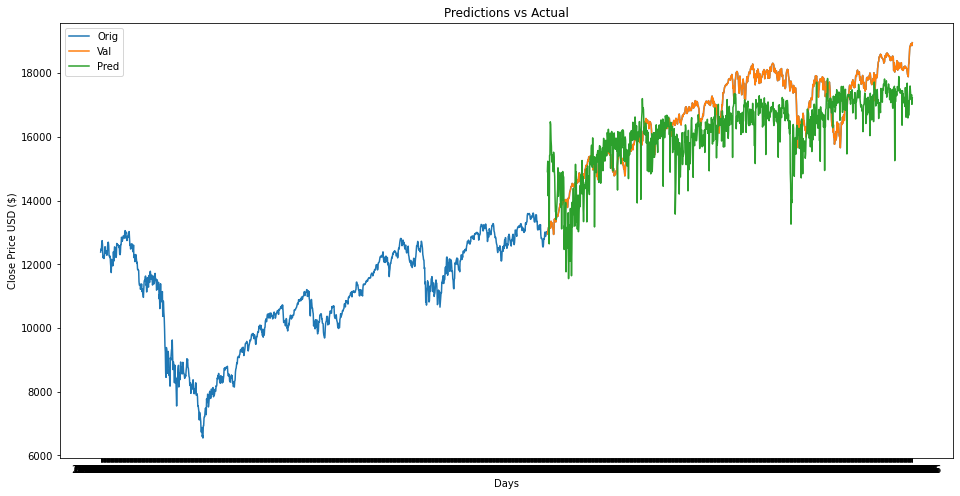

In [35]:
prediction = model.predict(x_future_data)
predictions = prediction
valid = df1[X.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize = (16, 8))
plt.title("Predictions vs Actual")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df1["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Orig", "Val", "Pred"])

In [36]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(x_test, y_test))

Variance score: 0.34


In [37]:
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test,model.predict(x_test)))
print("Mean Absolute error: %.2f" % metrics.mean_absolute_error(y_test,model.predict(x_test)))
print("RMSE: %.2f" % np.sqrt(metrics.mean_squared_error(y_test,model.predict(x_test))))

Mean squared error: 2496698.57
Mean Absolute error: 1235.94
RMSE: 1580.09


In [38]:
## LSTM

In [39]:
data_frame_stock = df1[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close','Volume']]

In [40]:
data_frame_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
28-01-2008,28-01-2008,12205.71,12386.01,12112.14,12383.89,12383.89,278990000
29-01-2008,29-01-2008,12385.19,12503.15,12346.99,12480.30,12480.30,285090000
30-01-2008,30-01-2008,12480.14,12681.41,12406.17,12442.83,12442.83,334680000
31-01-2008,31-01-2008,12438.28,12702.38,12249.93,12650.36,12650.36,394330000
01-02-2008,01-02-2008,12638.17,12767.74,12602.32,12743.19,12743.19,379580000


### Feature Distribution Visualization
The distribution of features is depicted in the diagram below. With this graph, you can gain a better understanding of the features and coefficient of the determination score. A heat map is created by over-index attributes. The relationship between the data set's specified features, such as Open, High, Low, Close, and Adj Close, can be displayed here. There is no correlation between the other features when we look at the Volume point in the heat map, which is a distinct feature. As a result, while making projections, it should be ruled out.

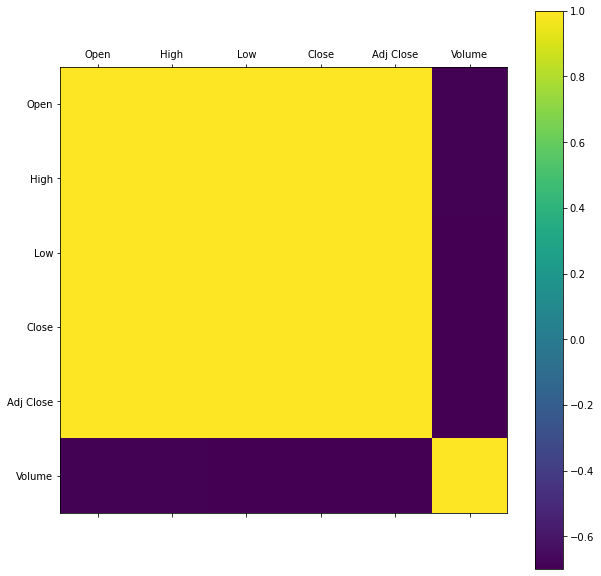

In [41]:
scaling_stock_data = data_frame_stock.filter(['Open','High','Low','Close','Adj Close','Volume'])
## Scaling the features
scaler = MinMaxScaler(feature_range=(0,1))
## Transform the data into
scaled_Data = scaler.fit_transform(scaling_stock_data)
## Display the scaled features into dataframe
scaled_data_frame = pd.DataFrame(data=scaled_Data, index=[data_frame_stock.Date], columns=['Open','High','Low','Close','Adj Close','Volume'] )
## Feature Scaling and visualization of feature distribution
rcParams['figure.figsize'] = 20, 10
plt.matshow(data_frame.corr())
plt.yticks(np.arange(scaled_data_frame.shape[1]), scaled_data_frame.columns)
plt.xticks(np.arange(scaled_data_frame.shape[1]), scaled_data_frame.columns)
plt.colorbar()

In [42]:
## Create a seperate dataframe with only colse column
stock_close = data_frame_stock.filter(['Close'])

## Convert created dataframe into numpy array
stock_close_dataset = stock_close.values

## Split dataset for training and testing
trainingDataLength = math.ceil( len(stock_close_dataset) * 0.8 )

## Display the training data length
trainingDataLength

1779

In [43]:

## Scaling the data its come under preprocessing stage
## Create feature range into 0,1
scaler = MinMaxScaler(feature_range=(0,1))

## Transform the data into
scaledData = scaler.fit_transform(stock_close_dataset)

## Display scaled data value
scaledData

array([[0.47034725],
       [0.47811621],
       [0.47509678],
       ...,
       [0.9957396 ],
       [0.9928475 ],
       [1.        ]])

In [44]:
## Create a new dataset which contain scaled value
StockTrainData = scaledData[0:trainingDataLength , :]

## Spliting the dataset into two parts such as Xtrain and Ytrain datasets
Xtrain = []
Ytrain = []

for i in range(60, len(StockTrainData)):
    Xtrain.append(StockTrainData[i-60:i, 0])
    Ytrain.append(StockTrainData[i, 0])
    if i<= 61:
        print(Xtrain)
        print(Ytrain)
        print()
    
      

[array([0.47034725, 0.47811621, 0.47509678, 0.49182007, 0.49930054,
       0.49059521, 0.46077727, 0.45553699, 0.45931631, 0.45408892,
       0.45875303, 0.46950274, 0.48391331, 0.46979042, 0.46747206,
       0.46658646, 0.47384211, 0.46232203, 0.47011597, 0.48536219,
       0.494605  , 0.49535925, 0.48632595, 0.4608788 , 0.46027524,
       0.45664097, 0.45996016, 0.44266715, 0.4308457 , 0.41847306,
       0.45204857, 0.44829584, 0.45115652, 0.43547113, 0.43717626,
       0.47105395, 0.44744328, 0.4685285 , 0.48362322, 0.48233067,
       0.47348755, 0.46378541, 0.45685048, 0.46059676, 0.4921424 ,
       0.48848073, 0.4898595 , 0.48852102, 0.48876357, 0.48586341,
       0.48190036, 0.48630984, 0.46563559, 0.46375318, 0.46862117,
       0.48931476, 0.48941307, 0.50785599, 0.50589461, 0.49745037])]
[0.5009146115439286]

[array([0.47034725, 0.47811621, 0.47509678, 0.49182007, 0.49930054,
       0.49059521, 0.46077727, 0.45553699, 0.45931631, 0.45408892,
       0.45875303, 0.46950274, 0.483

In [45]:
## Convert Xtrain data, Ytrain data into numpy array
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

In [46]:
## Reshape the Xtrain data (number of column and number of row)
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtrain.shape

(1719, 60, 1)

In [47]:
## Develop LSTM model
model = Sequential()

## Assign neurons as 50
neurons = 50

## First LSTM layer
model.add(LSTM(neurons, return_sequences=True, input_shape= (Xtrain.shape[1], 1))) 

## Second LSTM layer, no more layer for lstm so return_sequence is false
model.add(LSTM(neurons, return_sequences= False)) 

## Adding Dense layer which always have 25 neurons by default
model.add(Dense(25)) 
model.add(Dense(1))

In [48]:
##Compile  model
## mse= mean squared error
model.compile(optimizer='adam', loss='mse')

In [49]:
## Fiting model with given training dataset
history_data = model.fit(Xtrain, Ytrain, batch_size=50, epochs=210, verbose=2, validation_split=0.2)

Epoch 1/210
28/28 - 5s - loss: 0.0316 - val_loss: 0.0126 - 5s/epoch - 173ms/step
Epoch 2/210
28/28 - 1s - loss: 0.0026 - val_loss: 0.0019 - 983ms/epoch - 35ms/step
Epoch 3/210
28/28 - 1s - loss: 7.6165e-04 - val_loss: 4.5253e-04 - 1s/epoch - 36ms/step
Epoch 4/210
28/28 - 1s - loss: 5.8547e-04 - val_loss: 4.9594e-04 - 977ms/epoch - 35ms/step
Epoch 5/210
28/28 - 1s - loss: 5.7159e-04 - val_loss: 5.4279e-04 - 999ms/epoch - 36ms/step
Epoch 6/210
28/28 - 1s - loss: 5.6521e-04 - val_loss: 5.8834e-04 - 990ms/epoch - 35ms/step
Epoch 7/210
28/28 - 1s - loss: 5.5176e-04 - val_loss: 4.5860e-04 - 998ms/epoch - 36ms/step
Epoch 8/210
28/28 - 1s - loss: 5.4899e-04 - val_loss: 4.5671e-04 - 975ms/epoch - 35ms/step
Epoch 9/210
28/28 - 1s - loss: 5.5455e-04 - val_loss: 5.0855e-04 - 1s/epoch - 38ms/step
Epoch 10/210
28/28 - 1s - loss: 5.2753e-04 - val_loss: 4.1468e-04 - 1s/epoch - 36ms/step
Epoch 11/210
28/28 - 1s - loss: 5.1460e-04 - val_loss: 4.1347e-04 - 1s/epoch - 36ms/step
Epoch 12/210
28/28 - 1s - l

Epoch 93/210
28/28 - 1s - loss: 2.4638e-04 - val_loss: 1.4936e-04 - 1s/epoch - 37ms/step
Epoch 94/210
28/28 - 1s - loss: 2.0427e-04 - val_loss: 2.3592e-04 - 1s/epoch - 36ms/step
Epoch 95/210
28/28 - 1s - loss: 2.3433e-04 - val_loss: 1.3831e-04 - 1s/epoch - 37ms/step
Epoch 96/210
28/28 - 1s - loss: 1.9980e-04 - val_loss: 1.8320e-04 - 1s/epoch - 41ms/step
Epoch 97/210
28/28 - 1s - loss: 2.2345e-04 - val_loss: 1.4424e-04 - 1s/epoch - 37ms/step
Epoch 98/210
28/28 - 1s - loss: 2.2312e-04 - val_loss: 2.4820e-04 - 1s/epoch - 37ms/step
Epoch 99/210
28/28 - 1s - loss: 2.0166e-04 - val_loss: 1.3006e-04 - 1s/epoch - 37ms/step
Epoch 100/210
28/28 - 1s - loss: 1.9570e-04 - val_loss: 2.3935e-04 - 1s/epoch - 37ms/step
Epoch 101/210
28/28 - 1s - loss: 1.9685e-04 - val_loss: 1.4344e-04 - 1s/epoch - 37ms/step
Epoch 102/210
28/28 - 1s - loss: 1.9049e-04 - val_loss: 1.4824e-04 - 1s/epoch - 37ms/step
Epoch 103/210
28/28 - 1s - loss: 1.9023e-04 - val_loss: 1.7137e-04 - 1s/epoch - 37ms/step
Epoch 104/210
28/

28/28 - 1s - loss: 1.4951e-04 - val_loss: 3.6993e-04 - 1s/epoch - 36ms/step
Epoch 185/210
28/28 - 1s - loss: 1.6149e-04 - val_loss: 1.3721e-04 - 1s/epoch - 37ms/step
Epoch 186/210
28/28 - 1s - loss: 1.5480e-04 - val_loss: 2.3724e-04 - 1s/epoch - 36ms/step
Epoch 187/210
28/28 - 1s - loss: 1.4562e-04 - val_loss: 9.6103e-05 - 1s/epoch - 36ms/step
Epoch 188/210
28/28 - 1s - loss: 1.3865e-04 - val_loss: 1.0621e-04 - 1s/epoch - 39ms/step
Epoch 189/210
28/28 - 1s - loss: 1.4240e-04 - val_loss: 1.0166e-04 - 1s/epoch - 38ms/step
Epoch 190/210
28/28 - 1s - loss: 1.4153e-04 - val_loss: 1.7047e-04 - 1s/epoch - 37ms/step
Epoch 191/210
28/28 - 1s - loss: 1.5894e-04 - val_loss: 2.5585e-04 - 1s/epoch - 36ms/step
Epoch 192/210
28/28 - 1s - loss: 1.6485e-04 - val_loss: 1.3174e-04 - 1s/epoch - 39ms/step
Epoch 193/210
28/28 - 1s - loss: 1.4765e-04 - val_loss: 9.1182e-05 - 1s/epoch - 41ms/step
Epoch 194/210
28/28 - 1s - loss: 1.4931e-04 - val_loss: 1.2096e-04 - 1s/epoch - 37ms/step
Epoch 195/210
28/28 - 1s

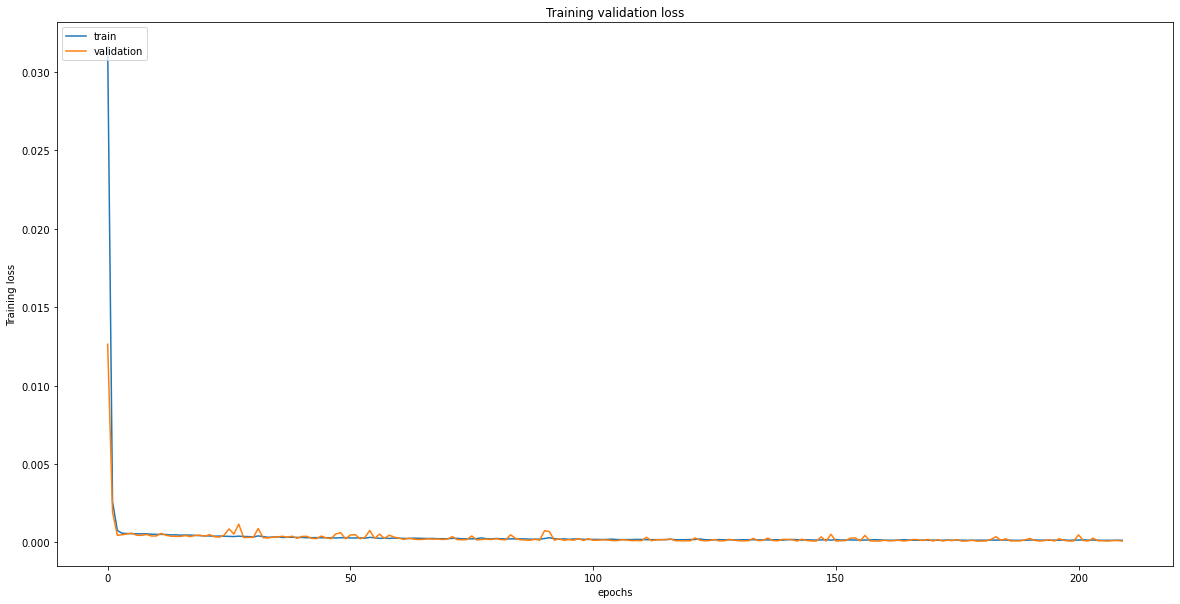

In [50]:
## Visualize train and validation loss
plt.figure(figsize=(20,10))
plt.title('Training validation loss')
plt.plot(history_data.history['loss'])
plt.plot(history_data.history['val_loss'])
plt.ylabel('Training loss')
plt.xlabel('epochs')
plt.legend(['train' , 'validation'], loc = 'upper left')
plt.show()

In [51]:
##Create testing dataset, new array which contains scaled value from 2275 out of 2843
testingData = scaledData[trainingDataLength - 60: , :]

## Create dataset Xtest and Ytest
Xtest = []
Ytest = stock_close_dataset[trainingDataLength:, :]
for i in range(60, len(testingData)):
    Xtest.append(testingData[i-60:i, 0])

In [52]:
## Convert data into numpy array
Xtest = np.array(Xtest)
Xtest

array([[0.90760167, 0.90823344, 0.90799491, ..., 0.92674163, 0.9253129 ,
        0.92176082],
       [0.90823344, 0.90799491, 0.90902718, ..., 0.9253129 , 0.92176082,
        0.93422452],
       [0.90799491, 0.90902718, 0.90906666, ..., 0.92176082, 0.93422452,
        0.93232277],
       ...,
       [0.96170638, 0.95904152, 0.95476984, ..., 0.99290874, 0.99729001,
        0.99286442],
       [0.95904152, 0.95476984, 0.96343971, ..., 0.99729001, 0.99286442,
        0.9957396 ],
       [0.95476984, 0.96343971, 0.95951615, ..., 0.99286442, 0.9957396 ,
        0.9928475 ]])

In [53]:
## Reshape data from 2 Dimensional to 3 Dimensional
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1 ))

In [54]:
## Get predicted stock price value
## Unscaling the predicted value
predictions = model.predict(Xtest)
predictions = scaler.inverse_transform(predictions)
predictions

array([[17984.553 ],
       [18173.938 ],
       [18126.719 ],
       [18224.76  ],
       [18230.902 ],
       [18211.332 ],
       [18119.303 ],
       [18316.818 ],
       [18199.309 ],
       [18076.732 ],
       [18146.523 ],
       [17824.893 ],
       [18023.914 ],
       [17636.225 ],
       [17638.33  ],
       [17960.924 ],
       [17750.172 ],
       [18006.213 ],
       [17835.457 ],
       [18100.459 ],
       [17944.947 ],
       [18144.217 ],
       [18119.14  ],
       [17990.602 ],
       [17674.34  ],
       [17684.594 ],
       [17751.723 ],
       [18045.674 ],
       [17764.66  ],
       [17679.197 ],
       [17782.162 ],
       [17915.11  ],
       [17884.422 ],
       [17906.395 ],
       [17970.055 ],
       [18076.904 ],
       [17967.047 ],
       [18044.03  ],
       [18133.016 ],
       [18110.748 ],
       [17783.916 ],
       [18071.363 ],
       [17963.67  ],
       [18058.844 ],
       [18072.67  ],
       [18086.441 ],
       [18032.86  ],
       [18122

In [55]:

rmse=np.sqrt(np.mean(((predictions- Ytest)**2)))
rmse

156.89905934922646

<ipython-input-57-b5045234446c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


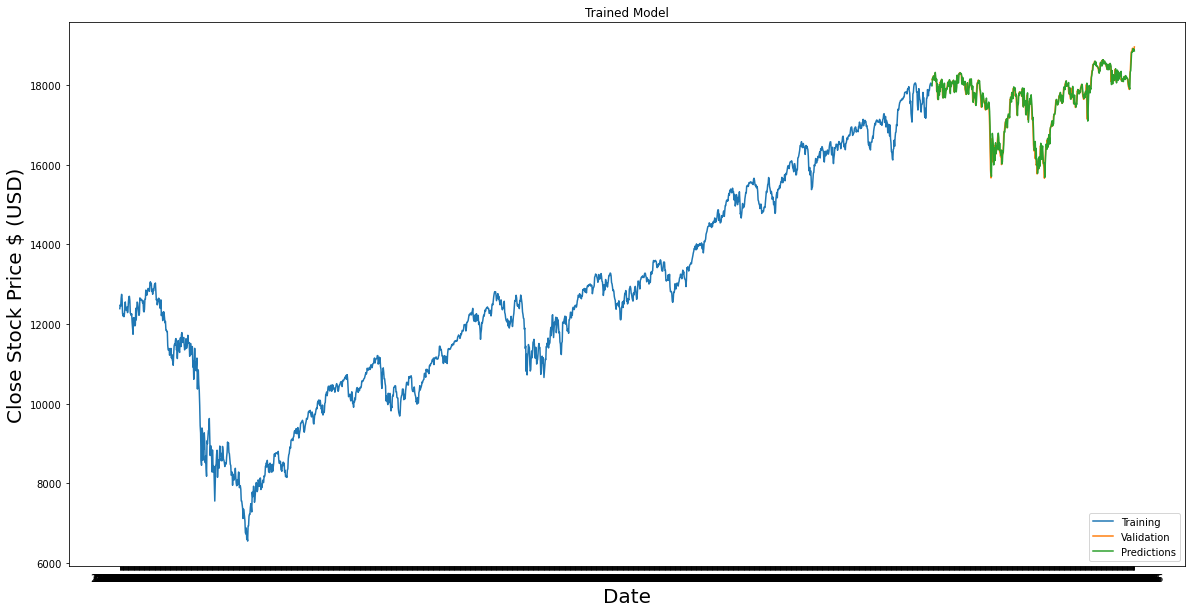

In [57]:
## Ploting data to graph train and validation
training = stock_close[:trainingDataLength]
validation = stock_close[trainingDataLength:]
validation['Predictions'] = predictions

## Visualize trainning, validating and predicting values in graph
plt.figure(figsize=(20,10))
plt.title('Trained Model')
#plt.xticks(range(0,data_frame.shape[0],500),data_frame['Date'].loc[::500],rotation=45)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Stock Price $ (USD)', fontsize=20)
plt.plot(training['Close'])
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Training', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [58]:
## Show  validate and predicted stock prices
validation

,Close,Predictions
Date,,
20-02-2015,18140.44,17984.552734
23-02-2015,18116.84,18173.937500
24-02-2015,18209.19,18126.718750
25-02-2015,18224.57,18224.759766
26-02-2015,18214.42,18230.902344
...,...,...
15-11-2016,18923.06,18837.080078
16-11-2016,18868.14,18909.765625
17-11-2016,18903.82,18844.736328


### Linear Regression VS LSTM:
Regression is a strategy for dealing with linear dependencies; neural networks, on the other hand, can handle nonlinearities.

Linear Regression RMSE: 763.24
LSTM RMSE: 160 

As a result, if your data has nonlinear dependencies, neural networks should outperform regression.

## Things to do:

- Classification ( stock price increase or decrease 0/1)
- Supervised Machine learning algo ( Naive Bayes,  Logistic, Decision Tree Random Forest)
- Natural Language process , topic modeling on news data 
